# Clustering Crypto

In [91]:
# Initial imports
import requests
from pathlib import Path
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Fetching Cryptocurrency Data

In [92]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [93]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [94]:
# Alternatively, use the provided csv file:
# file_path = Path("Resources/crypto_data.csv")
file_path = Path("Data/crypto_data.csv")
# Create a DataFrame
crypto_df = pd.read_csv(file_path)
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


### Data Preprocessing

In [95]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df = crypto_df.drop(["Unnamed: 0"], axis=1)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015 coin,X11,True,PoW/PoS,NaN,0
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [96]:
# Keep only cryptocurrencies that are trading
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [97]:
# Remove the "IsTrading" column
crypto_df = crypto_df.drop(["IsTrading"], axis = 1)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [98]:
# Remove rows with at least 1 null value
crypto_df= crypto_df.dropna()
crypto_df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [99]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] != 0]
crypto_df.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [100]:
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [101]:
# Drop rows where there are 'N/A' text values
for column in crypto_df:
    crypto_df = crypto_df.loc[crypto_df[column] != 'N/A']
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZCash,Equihash,PoW,7.383056e+06,21000000


In [102]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coins_name_df = crypto_df['CoinName'].to_frame()
coins_name_df.describe()

,CoinName
count,533
unique,532
top,DubaiCoin
freq,2


In [103]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
final_crypto_df = crypto_df.drop(['CoinName'], axis=1)
final_crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [104]:
# Create dummy variables for text features
X = pd.get_dummies(final_crypto_df)
X

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# Standardize data
X_scaled = StandardScaler().fit_transform(X)

### Reducing Dimensions Using PCA

In [106]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)

In [107]:
# Create a DataFrame with the principal components data
crypto_pca = pca.fit_transform(X_scaled)
pcs_df = pd.DataFrame(data= crypto_pca, columns=["PC 1", "PC 2", "PC 3"], index = crypto_df.index)
pcs_df.head()                                                

,PC 1,PC 2,PC 3
0,-0.320153,-0.025333,-0.040073
2,-0.300935,-0.027283,-0.045818
5,0.520987,-0.014440,-0.122389
7,-0.232868,-0.175550,-0.060589
8,-0.020182,-0.138364,-0.304817


In [108]:
# Fetch the explained variance- Adding up the 3 arrays only explains approx 24% of variance. 
# Hence need more components- this can be determined using the K curve.
pca.explained_variance_ratio_

array([0.00830629, 0.00792463, 0.00789915])

### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [109]:
import hvplot.pandas
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

##Running K-Means with `k=4` as the curve dips significantly after 4.
Note that K could be 5 or K can be 4 as each time I run the code the elbow curve changes. For the purposes of this assignment, I will use 4 as the number of clusters based on the above diagram.

In [110]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

In [111]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = pd.concat([final_crypto_df, pcs_df, coins_name_df], axis ="columns", join = 'inner')
clustered_df['Class'] = predictions
clustered_df.tail(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
1226,SHA-256,PoS,1.000000e+09,1000000000,0.059149,-0.059068,0.069639,TigerCash,0
1230,Leased POS,LPoS,1.000000e+08,100000000,-0.707428,0.431246,0.190239,Waves,0
1231,PoS,PoS,9.283138e+06,8634140,0.205530,0.104074,0.072783,Particl,0
1234,TRC10,DPoS,9.899887e+11,990000000000,36.601737,-1.726118,-6.511537,BitTorrent,2
1237,PoS,PoS/LPoS,1.000000e+09,1000000000,0.217696,-0.071715,0.050249,Nxt,0
1238,SHA-256,DPoS,2.000000e+09,2000000000,2.333671,-0.135814,-0.164504,ZEPHYR,0
1242,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.324924,-0.086762,-0.067717,Gapcoin,0
1245,CryptoNight,PoW,9.802226e+08,1400222610,0.026661,-0.358117,-0.171569,Beldex,0
1246,Equihash,PoW,7.296538e+06,21000000,-0.297485,-0.278676,-0.154539,Horizen,0
1247,Scrypt,PoS,1.283270e+05,1000000,-0.134163,-0.026006,-0.007347,BitcoinPlus,0


### Visualizing Results

#### 3D-Scatter with Clusters

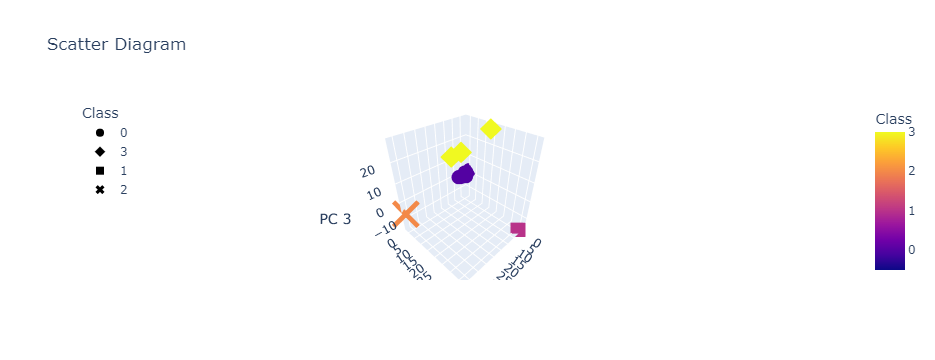

In [112]:
# Create a 3D-Scatter with the PCA data and the clusters since we have three principal components
fig = px.scatter_3d(clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    hover_name='CoinName',
    hover_data= ['Algorithm'],
    color="Class",
    symbol="Class",
    width=1000,
    title = "Scatter Diagram"
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


#### Table of Tradable Cryptocurrencies

In [113]:
# Table with tradable cryptos
clustered_df.hvplot.table(columns = 
            ['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], 
            sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [114]:
# Print the total number of tradable cryptocurrencies
print(f"Total number of tradeable currencies: {len(clustered_df['CoinName'])}")

Total number of tradeable currencies: 533


#### Scatter Plot with Tradable Cryptocurrencies

In [115]:
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
0,Scrypt,PoW/PoS,4.199995e+01,42,-0.320153,-0.025333,-0.040073,42 Coin,0
2,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.300935,-0.027283,-0.045818,404Coin,0
5,X13,PoW/PoS,2.927942e+10,314159265359,0.520987,-0.014440,-0.122389,EliteCoin,0
7,SHA-256,PoW,1.792718e+07,21000000,-0.232868,-0.175550,-0.060589,Bitcoin,0
8,Ethash,PoW,1.076842e+08,0,-0.020182,-0.138364,-0.304817,Ethereum,0


In [116]:
# Scale data to create the scatter plot- Max-min scaling
clustered_df['TotalCoinsMined_scaled'] = (clustered_df['TotalCoinsMined'] - clustered_df['TotalCoinsMined'].min()) / (clustered_df['TotalCoinsMined'].max()- clustered_df['TotalCoinsMined'].min())

In [117]:
# Scale data to create the scatter plot- Max-min scaling
clustered_df['TotalCoinSupply'] = clustered_df['TotalCoinSupply'].astype('float')
clustered_df['TotalCoinSupply'] = clustered_df['TotalCoinSupply'].astype('int')
clustered_df['TotalCoinSupply_scaled'] = (clustered_df['TotalCoinSupply'] - clustered_df['TotalCoinSupply'].min()) / (clustered_df['TotalCoinSupply'].max() - clustered_df['TotalCoinSupply'].min())

In [118]:
clustered_df.head(10)
#clustered_df['TotalCoinSupply_scaled'] = (clustered_df['TotalCoinSupply'] - clustered_df['TotalCoinSupply'].min()) / (clustered_df['TotalCoinSupply'].max() - clustered_df['TotalCoinSupply'].min())

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class,TotalCoinsMined_scaled,TotalCoinSupply_scaled
0,Scrypt,PoW/PoS,4.199995e+01,42,-0.320153,-0.025333,-0.040073,42 Coin,0,0.005942,-0.500000
2,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.300935,-0.027283,-0.045818,404Coin,0,0.007002,-0.376134
5,X13,PoW/PoS,2.927942e+10,-2147483648,0.520987,-0.014440,-0.122389,EliteCoin,0,0.035342,0.000000
7,SHA-256,PoW,1.792718e+07,21000000,-0.232868,-0.175550,-0.060589,Bitcoin,0,0.005960,-0.495111
8,Ethash,PoW,1.076842e+08,0,-0.020182,-0.138364,-0.304817,Ethereum,0,0.006050,-0.500000
9,Scrypt,PoW,6.303924e+07,84000000,-0.368837,-0.215976,-0.109321,Litecoin,0,0.006006,-0.480442
10,X11,PoW/PoS,9.031294e+06,22000000,-0.307265,0.076197,0.038495,Dash,0,0.005951,-0.494878
11,CryptoNight-V7,PoW,1.720114e+07,0,-0.124642,-0.332976,-0.113318,Monero,0,0.005960,-0.500000
12,Ethash,PoW,1.133597e+08,210000000,-0.100520,-0.133460,-0.360828,Ethereum Classic,0,0.006056,-0.451106
13,Equihash,PoW,7.383056e+06,21000000,-0.297484,-0.278676,-0.154539,ZCash,0,0.005950,-0.495111


In [119]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
clustered_df.hvplot.scatter(
    x="TotalCoinsMined_scaled",
    y="TotalCoinSupply_scaled",
    hover_cols=["CoinName"],
    by="Class",
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined_scaled]   (TotalCoinSupply_scaled,CoinName)

In [120]:
#The End